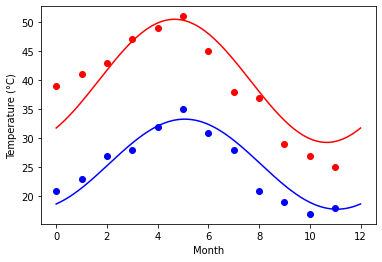

In [210]:
#We have the min and max temperatures in a city In India for each months of the year.
#We would like to find a function to describe this and show it graphically
import matplotlib.pyplot as plt
from scipy import optimize
#data in array
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([ 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,Max, [22, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,Min, [30, 20, 0])
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.show()

In [211]:
import pandas as pd
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


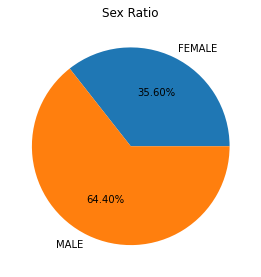

In [218]:
#Create a pie chart presenting the male/female proportion
import matplotlib.pyplot as plt#for plotting
from matplotlib.gridspec import GridSpec# for managibg size of piechart
title_type = titanic.groupby('sex').agg('count') #for calculating counts of categorical values
type_labels = ['FEMALE','MALE']
type_counts = title_type.pclass.sort_values()
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0,1],aspect=1, title='Sex Ratio')#adjusting  piechart and label
type_pclass= plt.pie(type_counts, labels=type_labels, autopct='%1.2f%%')
plt.show()

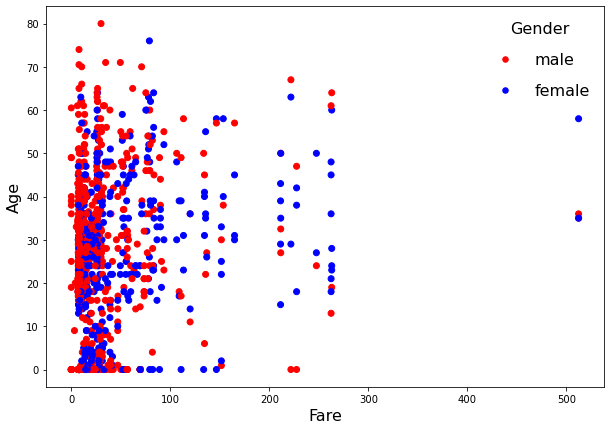

In [225]:
#Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
import matplotlib.pyplot as plt
import pandas as pd

fare1 =titanic['fare'].fillna(0).to_numpy()
age1 =titanic['age'].fillna(0).to_numpy()
titanic["sex"].fillna("male", inplace = True)
color=titanic['sex'].to_numpy()

df = pd.DataFrame(dict(fare1=fare1 , age1=age1, color=color))

fig,ax = plt.subplots(figsize=(10,7 ))

colors = {'male':'red', 'female':'blue'}

ax.scatter(df['fare1'], df['age1'], c=df['color'].apply(lambda x: colors[x]))
plt.xlabel('Fare',fontsize=16)
plt.ylabel('Age',fontsize=16)


for a in ['male','female']:
    if(a=='male'):
            plt.scatter([], [], c='red', alpha=1 ,label=a,s=30)
    if(a=='female'):
            plt.scatter([], [], c='blue', alpha= 1,label=a,s=30)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Gender',fontsize=16,title_fontsize=16)

plt.show()